In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [54]:
df=pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.shape

(6362620, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Exploratory Data Analysis

In [15]:
# Check the fraud/Non_Fraud related records
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [16]:
# find % values of isFraud
(df.groupby('isFraud')['isFraud'].count()/df['isFraud'].count()) *100

isFraud
0    99.870918
1     0.129082
Name: isFraud, dtype: float64

In [19]:
def plot_count(df, feature, title='', size=2):
    f, ax = plt.subplots(1,1, figsize=(3*size,2*size))
    total = float(len(df))
    sns.countplot(df[feature],order = df[feature].value_counts().index, palette='Set2')
    plt.title(title)
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.4f}%'.format(100*height/total),
                ha="center") 
        ax.set_facecolor("ghostwhite")
    plt.show()

c:\users\chand\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


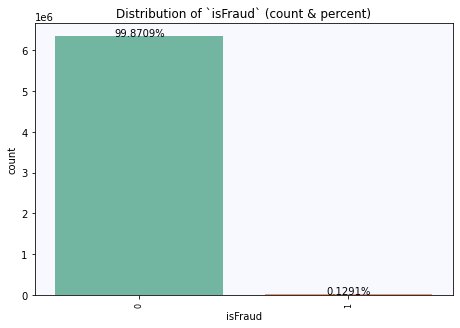

In [20]:
plot_count(df, 'isFraud', 'Distribution of `isFraud` (count & percent)', size=2.5)

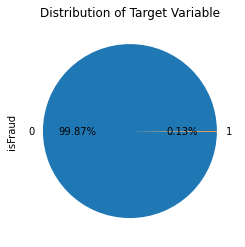

In [17]:
#pie chart representation
df['isFraud'].value_counts().plot.pie(autopct='%1.2f%%',shadow=False)
plt.title("Distribution of Target Variable")
plt.show()

Conclusions:
1.Total number of data point is 6362620 in which 8213 is fraud and 6354407 is not fraud data point.
2.This shows that the Data is highly imblanced. Target variable distribution shows that we are dealing with an highly imbalanced problem as there are many more genuine transactions as compared to the fraudalent transactions.
3.Hence, we have to be careful in reporting our results.
4.Also, to improve results we might have to apply pre-processing techniques of undersampling the non-fraudulant transactions or oversampling of fradulant transactions while train-test split.

c:\users\chand\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


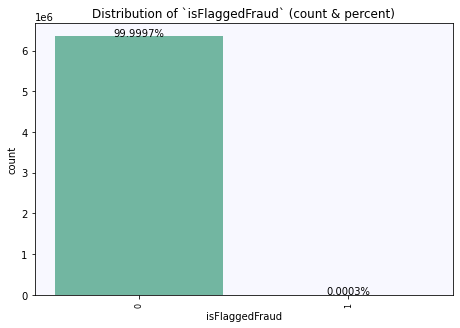

In [21]:
plot_count(df, 'isFlaggedFraud', 'Distribution of `isFlaggedFraud` (count & percent)', size=2.5)

Transaction is flagged fraud if the amount transferred is more than 200,000

In [22]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [23]:
df[df['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [24]:
#Minimum and Maximum amount that is transferred in flagged transactions
print('Minimum amount flagged as fraud -', df[df['isFlaggedFraud']==1].amount.min())
print('Maximum amount flagged as fraud -', df[df['isFlaggedFraud']==1].amount.max())

Minimum amount flagged as fraud - 353874.22
Maximum amount flagged as fraud - 10000000.0


In [25]:
# Investigate variable "isFlaggedFraud"
pd.crosstab(df.isFraud,df.isFlaggedFraud)

isFlaggedFraud,0,1
isFraud,,
0,6354407,0
1,8197,16


In [26]:
#Groupby type
df.groupby('type')['isFraud','isFlaggedFraud'].sum()

<ipython-input-26-085e006cd28f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('type')['isFraud','isFlaggedFraud'].sum()


,isFraud,isFlaggedFraud
type,,
CASH_IN,0,0
CASH_OUT,4116,0
DEBIT,0,0
PAYMENT,0,0
TRANSFER,4097,16


In [27]:
pd.crosstab(df['type'], df['isFraud'])

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


Fraud occurs only in 2 type of transactions: TRANSFER and CASH_OUT

Above table suggests that the fraud happens only if the type is 'Cash_out' or 'Transfer'. Perhaps, only selecting those cases might increase the accuracy of the model.

The number of fraudulent TRANSFERs = 4097

The number of fraudulent CASH_OUTs = 4116

The type of transactions in which isFlaggedFraud is set : TRANSFER

c:\users\chand\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


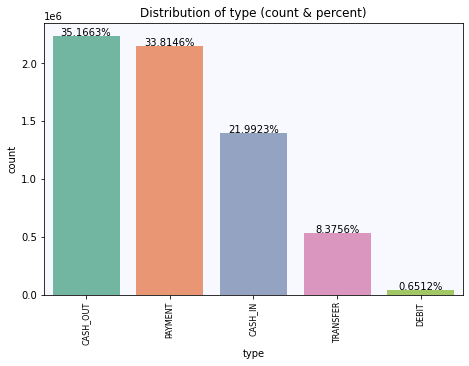

In [29]:
plot_count(df, 'type', 'Distribution of type (count & percent)', size=2.5)

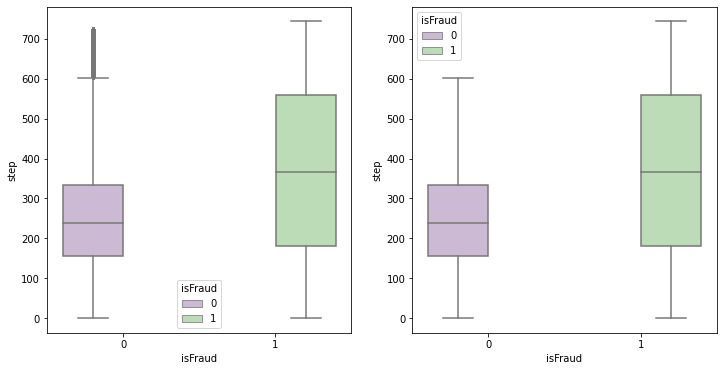

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="isFraud", y="step", hue="isFraud",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="isFraud", y="step", hue="isFraud",data=df, palette="PRGn",showfliers=False)
plt.show()

In [35]:
#Number of records based on Customer and Merchant transactions at origin and destination accounts
print("Customer-Customer Tractions-", df.loc[(df.nameOrig.str.contains('C')) & (df.nameDest.str.contains('C'))].shape[0])
print("Customer-Merchant Tractions-", df.loc[(df.nameOrig.str.contains('C')) & (df.nameDest.str.contains('M'))].shape[0])
print("Merchant-Customer Tractions-", df.loc[(df.nameOrig.str.contains('M')) & (df.nameDest.str.contains('C'))].shape[0])
print("Merchant-Merchant Tractions-", df.loc[(df.nameOrig.str.contains('M')) & (df.nameDest.str.contains('M'))].shape[0])

Customer-Customer Tractions- 4211125
Customer-Merchant Tractions- 2151495
Merchant-Customer Tractions- 0
Merchant-Merchant Tractions- 0


Conclusion : There are only frauds detected between customer-customer at origin and destination accounts. Therefore, nameOrig and nameDest coulumns won't help in detecting any pattern for fraud happening.
nameOrig and nameDest can dropped as they dont impact fraud. Also there are no suspicious transfers to merchants. Therefore they can be dropped.

In [36]:
print("Fraud Detected between Customer-Customer Tractions-", df.loc[(df.nameOrig.str.contains('C')) & (df.nameDest.str.contains('C')) & (df.isFraud == 1)].shape[0])
print("Fraud Detected between Customer-Merchant Tractions-", df.loc[(df.nameOrig.str.contains('C')) & (df.nameDest.str.contains('M')) & (df.isFraud == 1)].shape[0])

Fraud Detected between Customer-Customer Tractions- 8213
Fraud Detected between Customer-Merchant Tractions- 0


In [37]:
#Filtering the dataset with only relevent type of payments which have fraud cases in it
df.groupby(['type', 'isFraud']).size()

type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
dtype: int64

In [42]:
df.loc[df['isFlaggedFraud']==0].amount.describe()

count    6.362604e+06
mean     1.798501e+05
std      6.037884e+05
min      0.000000e+00
25%      1.338955e+04
50%      7.487127e+04
75%      2.087205e+05
max      9.244552e+07
Name: amount, dtype: float64

In [44]:
len(df.loc[(df['isFlaggedFraud']==1)& (df.isFraud==1)])

16

In description it is said 'isFlaggedFraud' will be 1 if amount of transaction is more than 200000, but the amount exceeds 200000 even when it is set to 0 as seen in above (where 75 percentile is more than 200000). Also whenever isFlaggedFraud is 1, value of isFraud is also 1. Therefore it doesn't so any correlation with other features and it can be dropped

In [62]:
df2 = df.loc[(df.type=='TRANSFER')|(df.type=='CASH_OUT')]
df2.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)
df2

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1
15,1,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1


In [83]:
train = df2.copy()
train.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0


As seen earlier, 0 values of oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest when amount is not 0 have a good chance of fraudulent transaction, we will create new freatures combining (oldbalanceOrg,newbalanceOrig,amount) and (oldbalanceDest,newbalanceDest,amount)

In [84]:
train['errorOrig'] = train['amount'] + train['newbalanceOrig'] - train['oldbalanceOrg']
train['errorDest'] = train['amount'] + train['oldbalanceDest'] - train['newbalanceDest']
train.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorOrig,errorDest
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1,0.00,181.0
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1,0.00,21363.0
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,-2401220.0


In [85]:
from sklearn.preprocessing import LabelEncoder
train['type'] = LabelEncoder().fit_transform(train['type'])
train.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorOrig,errorDest
2,1,1,181.00,181.0,0.0,0.0,0.00,1,0.00,181.0
3,1,0,181.00,181.0,0.0,21182.0,0.00,1,0.00,21363.0
15,1,0,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5
19,1,1,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3
24,1,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,-2401220.0


Modelling

From the model evaluation (or confusion matrix), we know that
Accuracy = (TP + TN) / Total
Presicion = TP / (TP + FP)
Recall = TP / (TP + FN)

As such, specifically for this problem, we are interested in the recall score to capture the most fraudulent transactions. As we know, due to the imbalance of the data, many observations could be predicted as False Negatives, being, that we predict a normal transaction, but it is in fact a fraudulent one. Recall captures this.

Obviously, trying to increase recall, tends to come with a decrease of precision. However, in our case, if we predict that a transaction is fraudulent and turns out not to be, is not a massive problem compared to the opposite.

Due to this, many evaluation will be based on recall score.

Performance Metric selection:

Since the data is highly skewed, I am using the area under the precision-recall curve (AUPRC) 

F1 score is the harmonic mean of the precision and recall. The highest possible value of F1 is 1, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero.

We should do more focus on FP & FN.

ML algorithm selection:

A first approach to deal with imbalanced data is to balance it by discarding the majority class before applying an ML algorithm. The disadvantage of undersampling is that a model trained in this way will not perform well on real-world skewed test data since almost all the information was discarded.

I find, however, that the best result is obtained on the original dataset by using a ML algorithm based on ensembles of decision trees that intrinsically performs well on imbalanced data. Such algorithms not only allow for constructing a model that can cope with the missing values in our data, but they naturally allow for speedup via parallel-processing.

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score,accuracy_score,f1_score,classification_report,precision_recall_curve,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [86]:
y = train['isFraud']
train.drop('isFraud',axis=1,inplace=True)

In [87]:
x_train,x_test,y_train,y_test = train_test_split(train,y,test_size=0.2)

In [88]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2216327, 9)
(2216327,)
(554082, 9)
(554082,)


In [89]:
random_forest = RandomForestClassifier()

In [90]:
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [91]:
y_pred = random_forest.predict(x_train)

In [92]:
def model_result(clf,x_test,y_test):
    y_prob=clf.predict_proba(x_test)
    y_pred=clf.predict(x_test)
    print('AUPRC :', (average_precision_score(y_test, y_prob[:, 1])))
    print('F1 - score :',(f1_score(y_test,y_pred)))
    print('Confusion_matrix : ')
    print(confusion_matrix(y_test,y_pred))
    print("accuracy_score")
    print(accuracy_score(y_test,y_pred))
    print("classification_report")
    print(classification_report(y_test,y_pred))

In [93]:
model_result(random_forest,x_train,y_train)

AUPRC : 1.0
F1 - score : 1.0
Confusion_matrix : 
[[2209780       0]
 [      0    6547]]
accuracy_score
1.0
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2209780
           1       1.00      1.00      1.00      6547

    accuracy                           1.00   2216327
   macro avg       1.00      1.00      1.00   2216327
weighted avg       1.00      1.00      1.00   2216327



In [94]:
model_result(random_forest,x_test,y_test)

AUPRC : 0.9964075836706066
F1 - score : 0.9972916039723142
Confusion_matrix : 
[[552416      0]
 [     9   1657]]
accuracy_score
0.9999837569168463
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552416
           1       1.00      0.99      1.00      1666

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082



Our default model performs good enough with recall score of 1.00 on both test and train data. By zooming in, only 5 prediction are False Negatives.

In [95]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
newbalanceOrig,0.395
oldbalanceOrg,0.109
type,0.097
errorOrig,0.094
newbalanceDest,0.086
amount,0.066
oldbalanceDest,0.063
step,0.051
errorDest,0.040


According to our model newbalanceOrig, oldbalanceOrg are two of the most important features maybe because all fraudulent transactions involve wiping out complete amount which would make newbalanceOrig 0.

Conclusion:

We explored the whole data using visualization techniques, added new features , removed unwanted features etc.

We also used random forest classifier because of skewness of the data, it is also robust to outliers.

In future developments, the company should be taking care of 'TRANSFER' and 'CASH-OUT' type of transactions as every fraud transaction is falls under these categories. The company should review the accounts whose balance becomes 0 after the transactions.